### Loading Packages

In [119]:
import numpy as np
import pandas as pd
import statistics as stats
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import json_normalize

from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Loading cleaned dataset

In [100]:
data = pd.read_csv('result_df_clean.csv')

In [101]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [102]:
data.isna().sum()

laps                         0
grid                         0
pits                         0
race.id                      0
driver.id                    0
driver.name                  0
team.name                    0
season                       0
distance                     0
weather                      0
status                       0
competition.location.city    0
circuit.name                 0
laps.total                   0
podium_position              0
win_loss                     0
fastest_lap                  0
dtype: int64

In [103]:
data.head()

,laps,grid,pits,race.id,driver.id,driver.name,team.name,season,distance,weather,status,competition.location.city,circuit.name,laps.total,podium_position,win_loss,fastest_lap
0,58,2,2.0,43,3.0,Jenson Button,McLaren Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,1,89.374
1,58,6,2.0,43,19.0,Sebastian Vettel,Red Bull Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,0,89.374
2,58,1,2.0,43,20.0,Lewis Hamilton,McLaren Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,0,89.374
3,58,5,2.0,43,38.0,Mark Webber,Red Bull Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,0,0,89.374
4,58,12,2.0,43,4.0,Fernando Alonso,Scuderia Ferrari,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,0,0,89.374


### Modeling starts here

In [106]:
# Split into y and X
y = data['podium_position']
X = data.drop(['podium_position'], axis = 1)

# Create groups for numerical and categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object) 

In [107]:
print(X_num.shape)
print(X_cat.shape)

(4296, 9)
(4296, 7)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [109]:
#categorical & numerical X-train
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
#categorical & numerical X-test

X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [110]:
from sklearn.preprocessing import StandardScaler

#Scaling X-train
standardtransformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(standardtransformer.transform(X_train_num),columns=X_train_num.columns)

#Scaling X-test
X_scaled_test = pd.DataFrame(standardtransformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,laps,pits,race.id,driver.id,season,distance,laps.total,win_loss,fastest_lap
0,0.684990,1.034689,1.277491,-0.689009,1.214860,0.249108,0.624786,-0.230258,-0.734483
1,0.067226,0.057988,0.830420,-0.120174,-0.677513,0.006511,-0.628899,-0.230258,1.306318
2,-0.269736,1.034689,-1.372383,1.529447,0.584069,-0.024719,-0.514928,-0.230258,0.504406
3,-0.045095,0.057988,0.739269,-0.404591,-1.308303,0.006511,-0.628899,-0.230258,1.208409
4,-1.055981,1.034689,-0.612796,-0.802775,-1.308303,0.097606,-0.970813,-0.230258,0.363169
...,...,...,...,...,...,...,...,...,...
855,-0.101255,-0.918713,-0.157044,-0.063290,-0.992908,0.154014,-0.856842,-0.230258,-0.123352
856,0.684990,0.057988,-1.174890,-0.177057,0.584069,0.195509,0.624786,-0.230258,-0.881095
857,0.123386,0.057988,-1.585067,-0.689009,-0.677513,0.318050,-0.400956,-0.230258,0.599964
858,0.741150,1.034689,-0.476070,-0.177057,-0.992908,0.359654,0.738757,-0.230258,-0.727262


In [111]:
from sklearn.preprocessing import OneHotEncoder
#Create encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#encode train
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

#encode test
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)

In [112]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

encoded_categorical_train = encoder.transform(X_train_cat).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train)

encoded_categorical_test = encoder.transform(X_test_cat).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test)


In [113]:
scaled_training_data = pd.concat([encoded_categorical_train,X_scaled_train],axis=1)
scaled_test_data = pd.concat([encoded_categorical_test,X_scaled_test],axis=1)

In [114]:
data_ = pd.concat([scaled_training_data,scaled_test_data],axis=0)

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(scaled_training_data, y_train)
print(clf.score(scaled_training_data, y_train))
print(clf.score(scaled_test_data, y_test))

0.7872526193247963
0.7895348837209303


In [116]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(scaled_test_data)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0    636
1    224
Name: podium_position, dtype: int64

array([[633,   3],
       [178,  46]])

In [117]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [120]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)

cross_val_scores = cross_val_score(clf, scaled_training_data, y_train, cv=10)
print(np.mean(cross_val_scores))


0.7881356363143264


In [121]:
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20).fit(scaled_training_data, y_train)

In [122]:
pred_y = clf.predict(scaled_test_data)
pred_y

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [123]:
print('accuracy:', accuracy_score(y_test, pred_y))
print("precision: ",precision_score(y_test,pred_y))
print("recall: ",recall_score(y_test,pred_y))
print("f1: ",f1_score(y_test,pred_y))

accuracy: 0.8732558139534884
precision:  0.8662420382165605
recall:  0.6071428571428571
f1:  0.7139107611548557


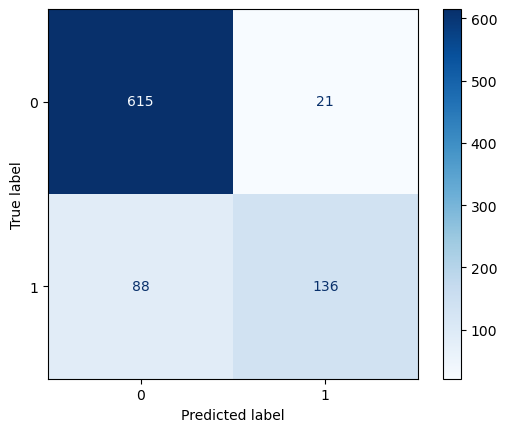

In [124]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, scaled_test_data, y_test,cmap=plt.cm.Blues)  
plt.show()

In [125]:
# Applying transformer on numeric Train data
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
X_test_num_norm = transformer.transform(X_test_num)

X_train_num_norm = pd.DataFrame(X_train_num_norm,columns=X_train_num.columns)
X_test_num_norm = pd.DataFrame(X_test_num_norm,columns=X_test_num.columns)

display(X_train_num_norm.head())
X_test_num_norm.head()

,laps,pits,race.id,driver.id,season,distance,laps.total,win_loss,fastest_lap
0,0.091954,0.000000,0.862242,0.908046,0.9,0.956631,0.400000,0.0,0.532211
1,0.816092,0.142857,0.840326,0.034483,0.9,0.956631,0.828571,0.0,0.104544
2,0.574713,0.285714,0.953037,0.563218,1.0,0.956631,0.228571,0.0,0.853900
3,0.747126,0.428571,0.162179,0.425287,0.0,0.946521,0.657143,0.0,0.427414
4,0.816092,0.285714,0.661866,0.264368,0.3,0.911219,0.800000,0.0,0.312281


,laps,pits,race.id,driver.id,season,distance,laps.total,win_loss,fastest_lap
0,0.758621,0.428571,0.865373,0.103448,0.9,0.956631,0.657143,0.0,0.305700
1,0.632184,0.285714,0.736381,0.218391,0.3,0.911240,0.342857,0.0,0.818377
2,0.563218,0.428571,0.100814,0.551724,0.7,0.905396,0.371429,0.0,0.616926
3,0.609195,0.285714,0.710081,0.160920,0.1,0.911240,0.342857,0.0,0.793781
4,0.402299,0.428571,0.319975,0.080460,0.1,0.928284,0.257143,0.0,0.581445


In [126]:
X_train_cat

,grid,driver.name,team.name,weather,status,competition.location.city,circuit.name
3777,19,Mick Schumacher,Haas F1 Team,Clear,Completed,Djeddah,Jeddah Corniche Circuit
3683,9,Fernando Alonso,Alpine F1 Team,Clear,Completed,Zandvoort,Circuit Zandvoort
4007,17,Alexander Albon,Williams F1 Team,Clear,Completed,Bakou,Baku City Circuit
82,11,Mark Webber,Red Bull Racing,Cloudy,Completed,Montmeló,Circuit de Barcelona-Catalunya
1415,11,Carlos Sainz Jr,Scuderia AlphaTauri Honda,Cloudy,Completed,Mexico,Autódromo Hermanos Rodríguez
...,...,...,...,...,...,...,...
4111,13,Kevin Magnussen,Haas F1 Team,Clear,Completed,Mogyoród,Hungaroring
3704,5,Carlos Sainz Jr,Scuderia Ferrari,Clear,Completed,Elroy,Circuit of The Americas
580,7,Romain Grosjean,Lotus F1 Team,Cloudy,Completed,Francorchamps,Circuit de Spa-Francorchamps
163,21,Pedro de la Rosa,HRT Formula One Team,Cloudy,Completed,Silverstone Northamptonshire,Silverstone Circuit


In [127]:
X_test_cat

,grid,driver.name,team.name,weather,status,competition.location.city,circuit.name
3781,4,Sergio Perez,Red Bull Racing,Clear,Completed,Algarve,Autódromo Internacional do Algarve
1444,2,Lewis Hamilton,Mercedes-AMG Petronas,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
2738,15,Lando Norris,McLaren Racing,Clear,Completed,Anting,Shanghai International Circuit
717,21,Jules Bianchi,Manor Marussia F1 Team,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
530,12,Jean-Eric Vergne,Scuderia AlphaTauri Honda,Cloudy,Completed,Silverstone Northamptonshire,Silverstone Circuit
...,...,...,...,...,...,...,...
978,18,Kamui Kobayashi,Caterham F1 Team,Cloudy,Completed,Monza,Autodromo Nazionale Monza
2744,3,Sebastian Vettel,Scuderia Ferrari,Sunny,Completed,Montmeló,Circuit de Barcelona-Catalunya
1130,11,Sergio Perez,Force India,Clear,Completed,Sakhir,Bahrain International Circuit
899,6,Sebastian Vettel,Red Bull Racing,Cloudy,Completed,Hockenheim,Hockenheimring


In [128]:
X_train_cat_ohe=X_train_cat[['driver.name','team.name','weather','competition.location.city','circuit.name']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat_ohe)
encoded = encoder.transform(X_train_cat_ohe).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat_ohe.columns)
X_train_cat_ohe = pd.DataFrame(encoded, columns=cols)
X_train_cat_ohe.head()

,driver.name_Alexander Albon,driver.name_Alexander Rossi,driver.name_Andre Lotterer,driver.name_Antonio Giovinazzi,driver.name_Brendon Hartley,driver.name_Bruno Senna,driver.name_Carlos Sainz Jr,driver.name_Charles Leclerc,driver.name_Charles Pic,driver.name_Daniel Ricciardo,driver.name_Daniil Kvyat,driver.name_Esteban Gutierrez,driver.name_Esteban Ocon,driver.name_Felipe Massa,driver.name_Felipe Nasr,driver.name_Fernando Alonso,driver.name_George Russell,driver.name_Guanyu Zhou,driver.name_Heikki Kovalainen,driver.name_Jean-Eric Vergne,driver.name_Jenson Button,driver.name_Jerome d'Ambrosio,driver.name_Jolyon Palmer,driver.name_Jules Bianchi,driver.name_Kamui Kobayashi,driver.name_Kevin Magnussen,driver.name_Kimi Raikkonen,driver.name_Lance Stroll,driver.name_Lando Norris,driver.name_Lewis Hamilton,driver.name_Marcus Ericsson,driver.name_Mark Webber,driver.name_Max Chilton,driver.name_Max Verstappen,driver.name_Michael Schumacher,driver.name_Mick Schumacher,driver.name_Narain Karthikeyan,driver.name_Nicholas Latifi,driver.name_Nico Hulkenberg,driver.name_Nico Rosberg,driver.name_Nikita Mazepin,driver.name_Nyck De Vries,driver.name_Pascal Wehrlein,driver.name_Pastor Maldonado,driver.name_Paul di Resta,driver.name_Pedro de la Rosa,driver.name_Pierre Gasly,driver.name_Rio Haryanto,driver.name_Robert Kubica,driver.name_Roberto Merhi,driver.name_Romain Grosjean,driver.name_Sebastian Vettel,driver.name_Sergey Sirotkin,driver.name_Sergio Perez,driver.name_Stoffel Vandoorne,driver.name_Timo Glock,driver.name_Valtteri Bottas,driver.name_Vitaly Petrov,driver.name_Will Stevens,driver.name_Yuki Tsunoda,team.name_Alpine F1 Team,team.name_Aston Martin F1 Team,team.name_Caterham F1 Team,team.name_Force India,team.name_HRT Formula One Team,team.name_Haas F1 Team,team.name_Lotus F1 Team,team.name_Manor Marussia F1 Team,team.name_Manor Racing,team.name_McLaren Racing,team.name_Mercedes-AMG Petronas,team.name_Red Bull Racing,team.name_Sauber F1 Team,team.name_Scuderia AlphaTauri Honda,team.name_Scuderia Ferrari,team.name_Williams F1 Team,weather_Cloudy,weather_Haze,weather_Partly Cloudy,weather_Rain,weather_Storm,weather_Sunny,competition.location.city_Algarve,competition.location.city_Anting,competition.location.city_Bakou,competition.location.city_Djeddah,competition.location.city_Elroy,competition.location.city_Francorchamps,competition.location.city_Hockenheim,competition.location.city_Imola,competition.location.city_Istanbul,competition.location.city_Le Castellet,competition.location.city_Losail,competition.location.city_Melbourne,competition.location.city_Mexico,competition.location.city_Miami,competition.location.city_Mogyoród,competition.location.city_Monte-Carlo,competition.location.city_Montréal,competition.location.city_Monza,competition.location.city_Mugello,competition.location.city_Nurburg,competition.location.city_Sakhir,competition.location.city_Silverstone Northamptonshire,competition.location.city_Singapour,competition.location.city_Sochi,competition.location.city_Spielberg,competition.location.city_Suzuka,competition.location.city_São Paulo,"competition.location.city_Yas Marina, Abou Dabi",competition.location.city_Zandvoort,circuit.name_Autodromo Enzo e Dino Ferrari,circuit.name_Autodromo Nazionale Monza,circuit.name_Autódromo Hermanos Rodríguez,circuit.name_Autódromo Internacional do Algarve,circuit.name_Autódromo José Carlos Pace,circuit.name_Bahrain International Circuit,circuit.name_Baku City Circuit,circuit.name_Circuit Gilles-Villeneuve,circuit.name_Circuit Paul Ricard,circuit.name_Circuit Zandvoort,circuit.name_Circuit de Barcelona-Catalunya,circuit.name_Circuit de Monaco,circuit.name_Circuit de Spa-Francorchamps,circuit.name_Circuit of The Americas,circuit.name_Hockenheimring,circuit.name_Hungaroring,circuit.name_Intercity Istanbul Park,circuit.name_Jeddah Corniche Circuit,circuit.name_Losail International Circuit,circuit.name_Marina Bay Street Circuit,circuit.name_Miami International Autodrome,circuit.name_Mugello,c

In [129]:
X_train_processed = pd.concat([X_train_num_norm, X_train_cat_ohe], axis=1)
X_train_processed.head()

,laps,pits,race.id,driver.id,season,distance,laps.total,win_loss,fastest_lap,driver.name_Alexander Albon,driver.name_Alexander Rossi,driver.name_Andre Lotterer,driver.name_Antonio Giovinazzi,driver.name_Brendon Hartley,driver.name_Bruno Senna,driver.name_Carlos Sainz Jr,driver.name_Charles Leclerc,driver.name_Charles Pic,driver.name_Daniel Ricciardo,driver.name_Daniil Kvyat,driver.name_Esteban Gutierrez,driver.name_Esteban Ocon,driver.name_Felipe Massa,driver.name_Felipe Nasr,driver.name_Fernando Alonso,driver.name_George Russell,driver.name_Guanyu Zhou,driver.name_Heikki Kovalainen,driver.name_Jean-Eric Vergne,driver.name_Jenson Button,driver.name_Jerome d'Ambrosio,driver.name_Jolyon Palmer,driver.name_Jules Bianchi,driver.name_Kamui Kobayashi,driver.name_Kevin Magnussen,driver.name_Kimi Raikkonen,driver.name_Lance Stroll,driver.name_Lando Norris,driver.name_Lewis Hamilton,driver.name_Marcus Ericsson,driver.name_Mark Webber,driver.name_Max Chilton,driver.name_Max Verstappen,driver.name_Michael Schumacher,driver.name_Mick Schumacher,driver.name_Narain Karthikeyan,driver.name_Nicholas Latifi,driver.name_Nico Hulkenberg,driver.name_Nico Rosberg,driver.name_Nikita Mazepin,driver.name_Nyck De Vries,driver.name_Pascal Wehrlein,driver.name_Pastor Maldonado,driver.name_Paul di Resta,driver.name_Pedro de la Rosa,driver.name_Pierre Gasly,driver.name_Rio Haryanto,driver.name_Robert Kubica,driver.name_Roberto Merhi,driver.name_Romain Grosjean,driver.name_Sebastian Vettel,driver.name_Sergey Sirotkin,driver.name_Sergio Perez,driver.name_Stoffel Vandoorne,driver.name_Timo Glock,driver.name_Valtteri Bottas,driver.name_Vitaly Petrov,driver.name_Will Stevens,driver.name_Yuki Tsunoda,team.name_Alpine F1 Team,team.name_Aston Martin F1 Team,team.name_Caterham F1 Team,team.name_Force India,team.name_HRT Formula One Team,team.name_Haas F1 Team,team.name_Lotus F1 Team,team.name_Manor Marussia F1 Team,team.name_Manor Racing,team.name_McLaren Racing,team.name_Mercedes-AMG Petronas,team.name_Red Bull Racing,team.name_Sauber F1 Team,team.name_Scuderia AlphaTauri Honda,team.name_Scuderia Ferrari,team.name_Williams F1 Team,weather_Cloudy,weather_Haze,weather_Partly Cloudy,weather_Rain,weather_Storm,weather_Sunny,competition.location.city_Algarve,competition.location.city_Anting,competition.location.city_Bakou,competition.location.city_Djeddah,competition.location.city_Elroy,competition.location.city_Francorchamps,competition.location.city_Hockenheim,competition.location.city_Imola,competition.location.city_Istanbul,competition.location.city_Le Castellet,competition.location.city_Losail,competition.location.city_Melbourne,competition.location.city_Mexico,competition.location.city_Miami,competition.location.city_Mogyoród,competition.location.city_Monte-Carlo,competition.location.city_Montréal,competition.location.city_Monza,competition.location.city_Mugello,competition.location.city_Nurburg,competition.location.city_Sakhir,competition.location.city_Silverstone Northamptonshire,competition.location.city_Singapour,competition.location.city_Sochi,competition.location.city_Spielberg,competition.location.city_Suzuka,competition.location.city_São Paulo,"competition.location.city_Yas Marina, Abou Dabi",competition.location.city_Zandvoort,circuit.name_Autodromo Enzo e Dino Ferrari,circuit.name_Autodromo Nazionale Monza,circuit.name_Autódromo Hermanos Rodríguez,circuit.name_Autódromo Internacional do Algarve,circuit.name_Autódromo José Carlos Pace,circuit.name_Bahrain International Circuit,circuit.name_Baku City Circuit,circuit.name_Circuit Gilles-Villeneuve,circuit.name_Circuit Paul Ricard,circuit.name_Circuit Zandvoort,circuit.name_Circuit de Barcelona-Catalunya,circuit.name_Circuit de Monaco,circuit.name_Circuit de Spa-Francorchamps,circuit.name_Circuit of The Americas,circuit.name_Hockenheimring,circuit.name_Hungaroring,circuit.name_Intercity Istanbul Park,circuit.name_Jeddah Corniche Circuit,circuit.name_Losail International Circuit,circuit.name_Marina Bay Stre

In [130]:
display(X_train_processed.isna().sum())
display(X_train_processed.shape)

laps                                               0
pits                                               0
race.id                                            0
driver.id                                          0
season                                             0
                                                  ..
circuit.name_Shanghai International Circuit        0
circuit.name_Silverstone Circuit                   0
circuit.name_Sochi Autodrom                        0
circuit.name_Suzuka International Racing Course    0
circuit.name_Yas Marina Circuit                    0
Length: 149, dtype: int64

(3436, 149)

In [131]:
X_test_cat

,grid,driver.name,team.name,weather,status,competition.location.city,circuit.name
3781,4,Sergio Perez,Red Bull Racing,Clear,Completed,Algarve,Autódromo Internacional do Algarve
1444,2,Lewis Hamilton,Mercedes-AMG Petronas,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
2738,15,Lando Norris,McLaren Racing,Clear,Completed,Anting,Shanghai International Circuit
717,21,Jules Bianchi,Manor Marussia F1 Team,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
530,12,Jean-Eric Vergne,Scuderia AlphaTauri Honda,Cloudy,Completed,Silverstone Northamptonshire,Silverstone Circuit
...,...,...,...,...,...,...,...
978,18,Kamui Kobayashi,Caterham F1 Team,Cloudy,Completed,Monza,Autodromo Nazionale Monza
2744,3,Sebastian Vettel,Scuderia Ferrari,Sunny,Completed,Montmeló,Circuit de Barcelona-Catalunya
1130,11,Sergio Perez,Force India,Clear,Completed,Sakhir,Bahrain International Circuit
899,6,Sebastian Vettel,Red Bull Racing,Cloudy,Completed,Hockenheim,Hockenheimring


In [132]:
X_test_cat_ohe=X_test_cat[['driver.name','team.name','weather','competition.location.city','circuit.name']]
encoded = encoder.transform(X_test_cat_ohe).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat_ohe.columns)
X_test_cat_ohe = pd.DataFrame(encoded, columns=cols)
X_test_cat_ohe.head()

,driver.name_Alexander Albon,driver.name_Alexander Rossi,driver.name_Andre Lotterer,driver.name_Antonio Giovinazzi,driver.name_Brendon Hartley,driver.name_Bruno Senna,driver.name_Carlos Sainz Jr,driver.name_Charles Leclerc,driver.name_Charles Pic,driver.name_Daniel Ricciardo,driver.name_Daniil Kvyat,driver.name_Esteban Gutierrez,driver.name_Esteban Ocon,driver.name_Felipe Massa,driver.name_Felipe Nasr,driver.name_Fernando Alonso,driver.name_George Russell,driver.name_Guanyu Zhou,driver.name_Heikki Kovalainen,driver.name_Jean-Eric Vergne,driver.name_Jenson Button,driver.name_Jerome d'Ambrosio,driver.name_Jolyon Palmer,driver.name_Jules Bianchi,driver.name_Kamui Kobayashi,driver.name_Kevin Magnussen,driver.name_Kimi Raikkonen,driver.name_Lance Stroll,driver.name_Lando Norris,driver.name_Lewis Hamilton,driver.name_Marcus Ericsson,driver.name_Mark Webber,driver.name_Max Chilton,driver.name_Max Verstappen,driver.name_Michael Schumacher,driver.name_Mick Schumacher,driver.name_Narain Karthikeyan,driver.name_Nicholas Latifi,driver.name_Nico Hulkenberg,driver.name_Nico Rosberg,driver.name_Nikita Mazepin,driver.name_Nyck De Vries,driver.name_Pascal Wehrlein,driver.name_Pastor Maldonado,driver.name_Paul di Resta,driver.name_Pedro de la Rosa,driver.name_Pierre Gasly,driver.name_Rio Haryanto,driver.name_Robert Kubica,driver.name_Roberto Merhi,driver.name_Romain Grosjean,driver.name_Sebastian Vettel,driver.name_Sergey Sirotkin,driver.name_Sergio Perez,driver.name_Stoffel Vandoorne,driver.name_Timo Glock,driver.name_Valtteri Bottas,driver.name_Vitaly Petrov,driver.name_Will Stevens,driver.name_Yuki Tsunoda,team.name_Alpine F1 Team,team.name_Aston Martin F1 Team,team.name_Caterham F1 Team,team.name_Force India,team.name_HRT Formula One Team,team.name_Haas F1 Team,team.name_Lotus F1 Team,team.name_Manor Marussia F1 Team,team.name_Manor Racing,team.name_McLaren Racing,team.name_Mercedes-AMG Petronas,team.name_Red Bull Racing,team.name_Sauber F1 Team,team.name_Scuderia AlphaTauri Honda,team.name_Scuderia Ferrari,team.name_Williams F1 Team,weather_Cloudy,weather_Haze,weather_Partly Cloudy,weather_Rain,weather_Storm,weather_Sunny,competition.location.city_Algarve,competition.location.city_Anting,competition.location.city_Bakou,competition.location.city_Djeddah,competition.location.city_Elroy,competition.location.city_Francorchamps,competition.location.city_Hockenheim,competition.location.city_Imola,competition.location.city_Istanbul,competition.location.city_Le Castellet,competition.location.city_Losail,competition.location.city_Melbourne,competition.location.city_Mexico,competition.location.city_Miami,competition.location.city_Mogyoród,competition.location.city_Monte-Carlo,competition.location.city_Montréal,competition.location.city_Monza,competition.location.city_Mugello,competition.location.city_Nurburg,competition.location.city_Sakhir,competition.location.city_Silverstone Northamptonshire,competition.location.city_Singapour,competition.location.city_Sochi,competition.location.city_Spielberg,competition.location.city_Suzuka,competition.location.city_São Paulo,"competition.location.city_Yas Marina, Abou Dabi",competition.location.city_Zandvoort,circuit.name_Autodromo Enzo e Dino Ferrari,circuit.name_Autodromo Nazionale Monza,circuit.name_Autódromo Hermanos Rodríguez,circuit.name_Autódromo Internacional do Algarve,circuit.name_Autódromo José Carlos Pace,circuit.name_Bahrain International Circuit,circuit.name_Baku City Circuit,circuit.name_Circuit Gilles-Villeneuve,circuit.name_Circuit Paul Ricard,circuit.name_Circuit Zandvoort,circuit.name_Circuit de Barcelona-Catalunya,circuit.name_Circuit de Monaco,circuit.name_Circuit de Spa-Francorchamps,circuit.name_Circuit of The Americas,circuit.name_Hockenheimring,circuit.name_Hungaroring,circuit.name_Intercity Istanbul Park,circuit.name_Jeddah Corniche Circuit,circuit.name_Losail International Circuit,circuit.name_Marina Bay Street Circuit,circuit.name_Miami International Autodrome,circuit.name_Mugello,c

In [133]:
X_test_processed = pd.concat([X_test_num_norm, X_test_cat_ohe], axis=1)
X_test_processed.head()

,laps,pits,race.id,driver.id,season,distance,laps.total,win_loss,fastest_lap,driver.name_Alexander Albon,driver.name_Alexander Rossi,driver.name_Andre Lotterer,driver.name_Antonio Giovinazzi,driver.name_Brendon Hartley,driver.name_Bruno Senna,driver.name_Carlos Sainz Jr,driver.name_Charles Leclerc,driver.name_Charles Pic,driver.name_Daniel Ricciardo,driver.name_Daniil Kvyat,driver.name_Esteban Gutierrez,driver.name_Esteban Ocon,driver.name_Felipe Massa,driver.name_Felipe Nasr,driver.name_Fernando Alonso,driver.name_George Russell,driver.name_Guanyu Zhou,driver.name_Heikki Kovalainen,driver.name_Jean-Eric Vergne,driver.name_Jenson Button,driver.name_Jerome d'Ambrosio,driver.name_Jolyon Palmer,driver.name_Jules Bianchi,driver.name_Kamui Kobayashi,driver.name_Kevin Magnussen,driver.name_Kimi Raikkonen,driver.name_Lance Stroll,driver.name_Lando Norris,driver.name_Lewis Hamilton,driver.name_Marcus Ericsson,driver.name_Mark Webber,driver.name_Max Chilton,driver.name_Max Verstappen,driver.name_Michael Schumacher,driver.name_Mick Schumacher,driver.name_Narain Karthikeyan,driver.name_Nicholas Latifi,driver.name_Nico Hulkenberg,driver.name_Nico Rosberg,driver.name_Nikita Mazepin,driver.name_Nyck De Vries,driver.name_Pascal Wehrlein,driver.name_Pastor Maldonado,driver.name_Paul di Resta,driver.name_Pedro de la Rosa,driver.name_Pierre Gasly,driver.name_Rio Haryanto,driver.name_Robert Kubica,driver.name_Roberto Merhi,driver.name_Romain Grosjean,driver.name_Sebastian Vettel,driver.name_Sergey Sirotkin,driver.name_Sergio Perez,driver.name_Stoffel Vandoorne,driver.name_Timo Glock,driver.name_Valtteri Bottas,driver.name_Vitaly Petrov,driver.name_Will Stevens,driver.name_Yuki Tsunoda,team.name_Alpine F1 Team,team.name_Aston Martin F1 Team,team.name_Caterham F1 Team,team.name_Force India,team.name_HRT Formula One Team,team.name_Haas F1 Team,team.name_Lotus F1 Team,team.name_Manor Marussia F1 Team,team.name_Manor Racing,team.name_McLaren Racing,team.name_Mercedes-AMG Petronas,team.name_Red Bull Racing,team.name_Sauber F1 Team,team.name_Scuderia AlphaTauri Honda,team.name_Scuderia Ferrari,team.name_Williams F1 Team,weather_Cloudy,weather_Haze,weather_Partly Cloudy,weather_Rain,weather_Storm,weather_Sunny,competition.location.city_Algarve,competition.location.city_Anting,competition.location.city_Bakou,competition.location.city_Djeddah,competition.location.city_Elroy,competition.location.city_Francorchamps,competition.location.city_Hockenheim,competition.location.city_Imola,competition.location.city_Istanbul,competition.location.city_Le Castellet,competition.location.city_Losail,competition.location.city_Melbourne,competition.location.city_Mexico,competition.location.city_Miami,competition.location.city_Mogyoród,competition.location.city_Monte-Carlo,competition.location.city_Montréal,competition.location.city_Monza,competition.location.city_Mugello,competition.location.city_Nurburg,competition.location.city_Sakhir,competition.location.city_Silverstone Northamptonshire,competition.location.city_Singapour,competition.location.city_Sochi,competition.location.city_Spielberg,competition.location.city_Suzuka,competition.location.city_São Paulo,"competition.location.city_Yas Marina, Abou Dabi",competition.location.city_Zandvoort,circuit.name_Autodromo Enzo e Dino Ferrari,circuit.name_Autodromo Nazionale Monza,circuit.name_Autódromo Hermanos Rodríguez,circuit.name_Autódromo Internacional do Algarve,circuit.name_Autódromo José Carlos Pace,circuit.name_Bahrain International Circuit,circuit.name_Baku City Circuit,circuit.name_Circuit Gilles-Villeneuve,circuit.name_Circuit Paul Ricard,circuit.name_Circuit Zandvoort,circuit.name_Circuit de Barcelona-Catalunya,circuit.name_Circuit de Monaco,circuit.name_Circuit de Spa-Francorchamps,circuit.name_Circuit of The Americas,circuit.name_Hockenheimring,circuit.name_Hungaroring,circuit.name_Intercity Istanbul Park,circuit.name_Jeddah Corniche Circuit,circuit.name_Losail International Circuit,circuit.name_Marina Bay Stre

In [134]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

lm = linear_model.LinearRegression()
lm.fit(X_train_processed,y_train)

predictions_test = lm.predict(X_test_processed)
r2=round(r2_score(y_test, predictions_test),2)
print("r2_score: ",r2)

r2_score:  0.42


In [135]:
def best_model_decision(model_list,X_train,y_train,X_test,y_test):
    for model in model_list:
        #1. Linear Regression
        if model=='linear regression model':
            lm = linear_model.LinearRegression()
            lm.fit(X_train,y_train)
            print("Linear Regression:")
            print("r2_score (train): ",round(r2_score(y_train, lm.predict(X_train)),2))    
            print("r2_score (test): ",round(r2_score(y_test, lm.predict(X_test)),2))
    
        #2. KNeighborsRegressor
        elif model=='knn model':
            knn = KNeighborsRegressor()
            knn.fit(X_train,y_train)
            print("K Nearest Neighbours:")
            print("r2_score (train): ",round(r2_score(y_train, knn.predict(X_train)),2))    
            print("r2_score (test): ",round(r2_score(y_test, knn.predict(X_test)),2))
            
        elif model=='mlp':
            mlp = MLPRegressor(random_state=1, max_iter=500)
            mlp.fit(X_train,y_train)
            print("Multi-layer Perceptron:")
            print("r2_score (train): ",round(r2_score(y_train, mlp.predict(X_train)),2))    
            print("r2_score (test): ",round(r2_score(y_test, mlp.predict(X_test)),2))

In [136]:
model_list=['linear regression model','knn model','mlp']
best_model_decision(model_list,X_train_processed,y_train,X_test_processed,y_test)

Linear Regression:
r2_score (train):  0.47
r2_score (test):  0.42
K Nearest Neighbours:
r2_score (train):  0.44
r2_score (test):  0.13
Multi-layer Perceptron:
r2_score (train):  0.91
r2_score (test):  0.19


In [137]:
## Random forest Classifier works well with an r score of 0.78
